## IMPORT LIBRARIES


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### READING AND UNDERSTANDING THE RETAIL SALES DATASET

In [2]:
#reading the dataset into pandas dataframe
retail_sales_df = pd.read_csv(r"C:\Users\chatu\OneDrive\Desktop\oasis infobyte\retail_sales_dataset.csv")


### DATA EXPLORATION


In [3]:
# Displaying the first five rows of the dataset
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
#Displaying the last five rows of the dataset
retail_sales_df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [11]:
# Now let us take a look of the data information 
retail_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [13]:
retail_sales_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


#### CHECK FOR THE MISSING DATA

In [15]:
retail_sales_df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

#### checking for the duplicate data

In [17]:
retail_sales_df.duplicated().sum()

0

### Frequency table of variables

### 1.Date

In [19]:
# Date

date_counts = pd.DataFrame(retail_sales_df['Date'].value_counts()).sort_values('count')
date_counts

,count
Date,
2023-05-28,1
2023-05-29,1
2023-06-28,1
2023-10-21,1
2023-06-27,1
...,...
2023-02-05,8
2023-08-05,8
2023-05-23,9


### 2.Age By Gender

In [21]:
retail_sales_df[['Gender', 'Age']]\
.groupby('Gender')['Age']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Gender,,,,,,,
Female,21092,41.356863,18,64,42.0,13.568067,510
Male,20300,41.428571,18,64,42.0,13.812208,490


### 3. Product category

##### Quantity by product category

In [23]:
retail_sales_df[['Product Category', 'Quantity']]\
.groupby('Product Category')['Quantity']\
.agg(['count','sum', 'mean', 'min', 'max', 'median', 'std'])

,count,sum,mean,min,max,median,std
Product Category,,,,,,,
Beauty,307,771,2.511401,1,4,3.0,1.100668
Clothing,351,894,2.547009,1,4,3.0,1.142647
Electronics,342,849,2.482456,1,4,2.0,1.153084


##### Age by product category

In [25]:
retail_sales_df[['Product Category','Age']]\
.groupby('Product Category')['Age']\
.agg(['count','sum','mean','min','max','median','std'])

,count,sum,mean,min,max,median,std
Product Category,,,,,,,
Beauty,307,12394,40.371336,18,64,41.0,13.889817
Clothing,351,14724,41.948718,18,64,42.0,13.498262
Electronics,342,14274,41.736842,18,64,42.0,13.669573


##### Price per unit by the product category

In [27]:

retail_sales_df[['Product Category','Price per Unit']]\
.groupby('Product Category')['Price per Unit']\
.agg(['count','sum','mean','min','max','median','std'])

,count,sum,mean,min,max,median,std
Product Category,,,,,,,
Beauty,307,56505,184.055375,25,500,50.0,194.929399
Clothing,351,61175,174.287749,25,500,50.0,186.017065
Electronics,342,62210,181.900585,25,500,50.0,189.049673


##### Total amount by the product category

In [29]:
retail_sales_df[['Product Category','Total Amount']]\
.groupby('Product Category')['Total Amount']\
.agg(['count','sum','mean','min','max','median','std'])

,count,sum,mean,min,max,median,std
Product Category,,,,,,,
Beauty,307,143515,467.475570,25,2000,120.0,563.612788
Clothing,351,155580,443.247863,25,2000,120.0,550.695917
Electronics,342,156905,458.786550,25,2000,150.0,567.540150


#### 4. Price per Unit 

In [31]:
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [33]:
data1 = retail_sales_df[['Product Category', 'Price per Unit']]
product_price = pd.DataFrame(data1)

frequency_table1 = {}
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    for index, row in product_price.iterrows():
        if row['Product Category'] == category:
            price = row['Price per Unit']
            if category in frequency_table1:
                if price in frequency_table1[category]:
                    frequency_table1[category][price] += 1
                else:
                    frequency_table1[category][price] = 1
            else:
                frequency_table1[category] = {price: 1}

for category, prices in frequency_table1.items():
    print("Category:", category)
    for price, count in prices.items():
        print("Price:", price, " - Count:", count)


Category: Beauty
Price: 50  - Count: 67
Price: 30  - Count: 56
Price: 25  - Count: 63
Price: 500  - Count: 68
Price: 300  - Count: 53
Category: Clothing
Price: 500  - Count: 64
Price: 25  - Count: 75
Price: 50  - Count: 75
Price: 30  - Count: 65
Price: 300  - Count: 72
Category: Electronics
Price: 30  - Count: 62
Price: 25  - Count: 72
Price: 300  - Count: 72
Price: 500  - Count: 67
Price: 50  - Count: 69


In [37]:
pd.DataFrame(frequency_table1)

,Beauty,Clothing,Electronics
50,67,75,69
30,56,65,62
25,63,75,72
500,68,64,67
300,53,72,72


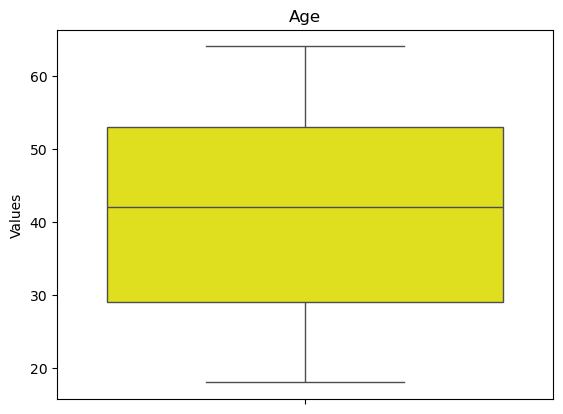

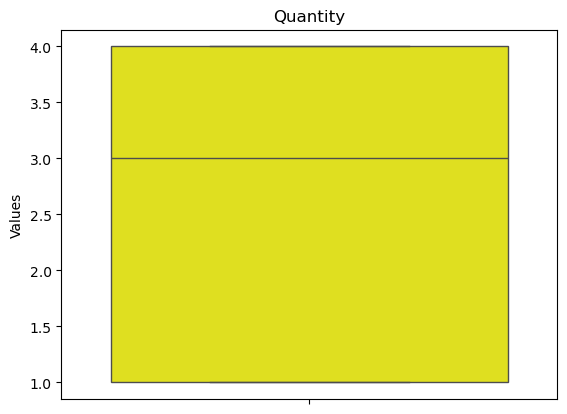

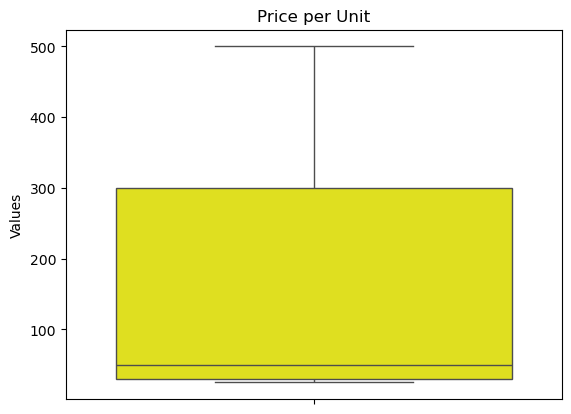

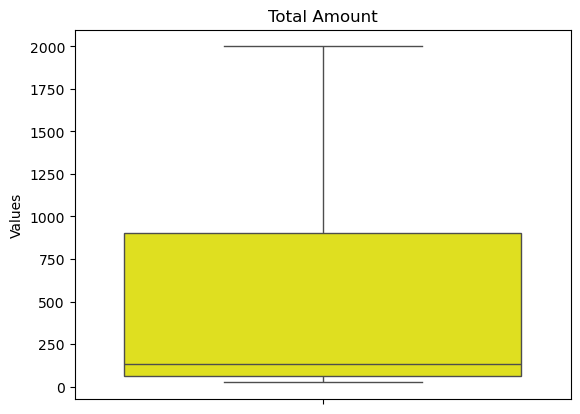

In [39]:
distribution_retail_sales_df = retail_sales_df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

for col in distribution_retail_sales_df.columns:
    plt.figure()
    sns.boxplot(y=distribution_retail_sales_df[col], color='yellow')
    plt.title(f'{col}')
    plt.ylabel('Values')
       
plt.show()

#### Correlation Matrix

<Axes: >

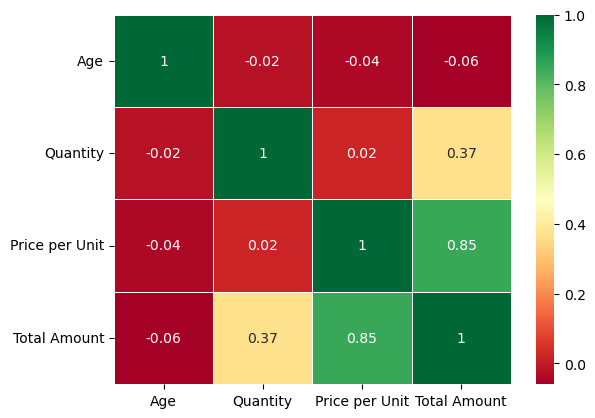

In [41]:
sns.heatmap(data=round(retail_sales_df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(),2),cmap='RdYlGn',linewidth= 0.5,annot=True)

### Let us start the data cleaning

In [43]:
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


#### Change the column name to the lower case

In [45]:
retail_sales_df.rename(columns=lambda x: x.lower(), inplace=True)


#### Clean the white spaces by replacing them with the underscore

In [47]:
retail_sales_df.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


#### Change the data type of date 

In [49]:
retail_sales_df['date'] = pd.to_datetime(retail_sales_df['date'])


In [51]:
retail_sales_df.dtypes

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                      object
age                          int64
product_category            object
quantity                     int64
price_per_unit               int64
total_amount                 int64
dtype: object

#### How does the customer age and gender influence their purchasing behaviour?

In [53]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [55]:
data3 = retail_sales_df[['product_category', 'age']]
product_age = pd.DataFrame(data3)

frequency_table2 = {}
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    for index, row in product_age.iterrows():
        if row['product_category'] == category:
            age = row['age']
            if category in frequency_table2:
                if age in frequency_table2[category]:
                    frequency_table2[category][age] += 1
                else:
                    frequency_table2[category][age] = 1
            else:
                frequency_table2[category] = {age: 1}

print("Frequency table for each category:")
for category, ages in frequency_table2.items():
    print("Category:", category)
    for age, count in ages.items():
        print("Age:", age, " - Count:", count)

Frequency table for each category:
Category: Beauty
Age: 34  - Count: 12
Age: 30  - Count: 12
Age: 45  - Count: 9
Age: 35  - Count: 6
Age: 50  - Count: 5
Age: 64  - Count: 10
Age: 38  - Count: 6
Age: 43  - Count: 6
Age: 39  - Count: 10
Age: 58  - Count: 6
Age: 52  - Count: 6
Age: 18  - Count: 9
Age: 40  - Count: 4
Age: 27  - Count: 11
Age: 36  - Count: 4
Age: 31  - Count: 2
Age: 63  - Count: 3
Age: 21  - Count: 9
Age: 48  - Count: 5
Age: 56  - Count: 4
Age: 51  - Count: 8
Age: 61  - Count: 5
Age: 32  - Count: 7
Age: 19  - Count: 7
Age: 28  - Count: 6
Age: 47  - Count: 10
Age: 55  - Count: 7
Age: 22  - Count: 9
Age: 60  - Count: 5
Age: 25  - Count: 7
Age: 46  - Count: 13
Age: 59  - Count: 5
Age: 62  - Count: 8
Age: 54  - Count: 10
Age: 42  - Count: 9
Age: 20  - Count: 8
Age: 57  - Count: 9
Age: 23  - Count: 6
Age: 29  - Count: 4
Age: 26  - Count: 4
Age: 49  - Count: 5
Age: 24  - Count: 5
Age: 44  - Count: 2
Age: 41  - Count: 2
Age: 33  - Count: 3
Age: 37  - Count: 2
Age: 53  - Count: 2


In [57]:
category_by_age = pd.DataFrame(frequency_table2)\
.sort_values('Clothing', ascending=False)\
.reset_index()\
.rename(columns= {'index':'age'})\
.sort_values('age')\
.reset_index()\
.drop(columns= ['index'])\
.rename(columns= {'Beauty':'amount_beauty', 'Clothing':'amount_clothing', 'Electronics':'amount_electronics'})
category_by_age.head()

,age,amount_beauty,amount_clothing,amount_electronics
0,18,9,7,5
1,19,7,3,11
2,20,8,6,7
3,21,9,7,4
4,22,9,8,10


In [59]:
# Create a function to segment customers by age

def categorize_age(age):
    if age>=18 and age<=24:
        return 'Age:18-24'
    elif age>=25 and age<=34:
        return 'Age:25-34'
    elif age>=35 and age<=44:
        return 'Age:35-44'
    elif age>=45 and age<=54:
        return 'Age:45-54'
    elif age>=55 and age<=64:
        return 'Age:55-64'

# create a new column in dataframe named "age group" and use the function categorize_age to divide into age groups
category_by_age['age_group'] = category_by_age['age'].apply(categorize_age)

category_by_age.head()

,age,amount_beauty,amount_clothing,amount_electronics,age_group
0,18,9,7,5,Age:18-24
1,19,7,3,11,Age:18-24
2,20,8,6,7,Age:18-24
3,21,9,7,4,Age:18-24
4,22,9,8,10,Age:18-24


In [61]:
retail_sales_df['age_group']=retail_sales_df['age'].apply(categorize_age)
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [63]:
retail_sales_df.groupby(['age_group'])['age_group'].agg('count')

age_group
Age:18-24    149
Age:25-34    203
Age:35-44    207
Age:45-54    225
Age:55-64    216
Name: age_group, dtype: int64

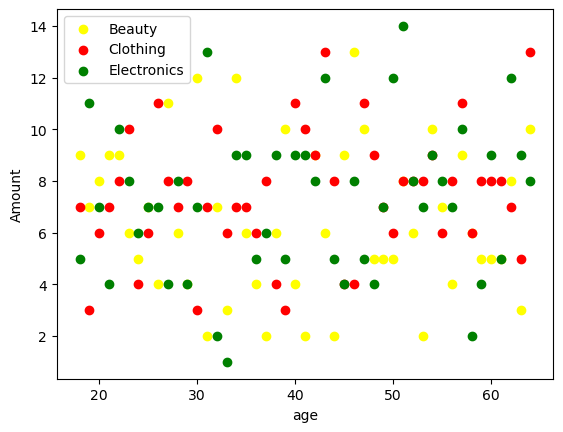

In [65]:
sns.scatterplot(x=category_by_age.age, s=25)
plt.scatter(category_by_age['age'], category_by_age['amount_beauty'], color='yellow', label='Beauty')
plt.scatter(category_by_age['age'], category_by_age['amount_clothing'], color='red', label='Clothing')  
plt.scatter(category_by_age['age'], category_by_age['amount_electronics'], color='green', label='Electronics')  
plt.ylabel('Amount')
plt.legend()
plt.show()

In [67]:
# Find the sum of the number of products in each category divided by age 
sum_by_age_category = pd.DataFrame(category_by_age.groupby(['age_group'])\
                                   .agg({'amount_beauty': 'sum', 'amount_clothing': 'sum', 'amount_electronics': 'sum'})\
                                   .reset_index())\
                                   .sort_values('age_group')\
                                   .transpose()\
                                   .rename(columns= {0:'Age:18-24', 1:'Age:25-34', 2:'Age:35-44', 3:'Age:45-54', 4:'Age:55-64'})\
                                   .reset_index()\
                                   .drop(index=0)\
                                   .reset_index()\
                                   .drop(columns= ['level_0'])\
                                   .rename(columns= {'index':'amount_by_category'})
                                   
sum_by_age_category


,amount_by_category,Age:18-24,Age:25-34,Age:35-44,Age:45-54,Age:55-64
0,amount_beauty,53,68,51,73,62
1,amount_clothing,45,73,79,74,80
2,amount_electronics,51,62,77,78,74


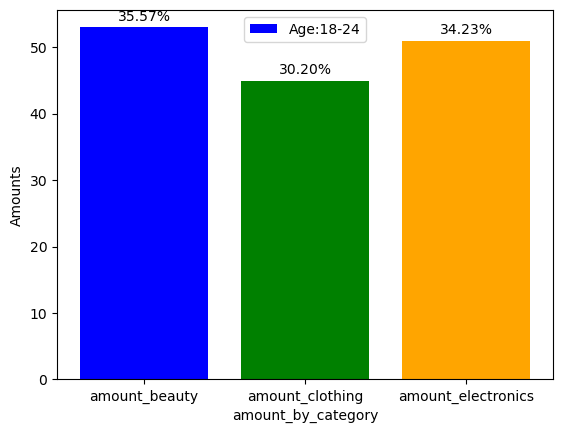

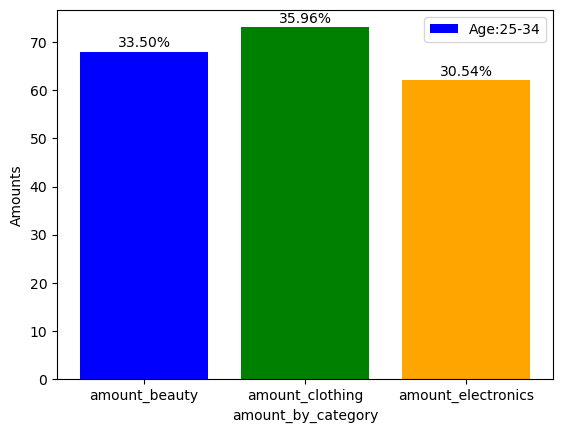

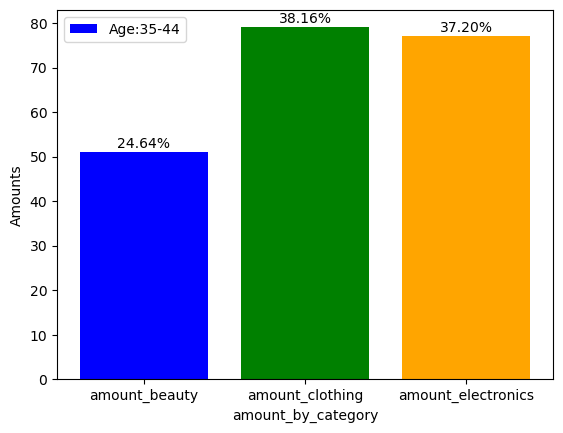

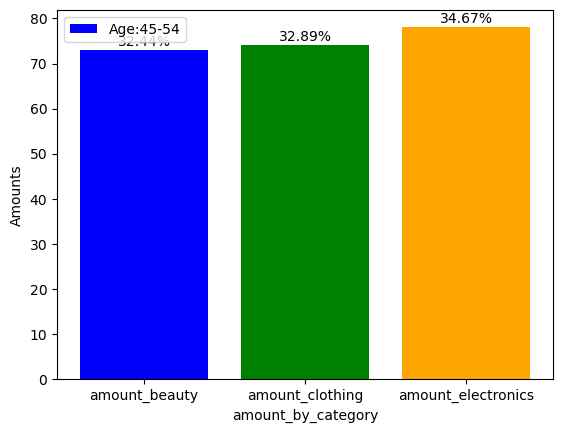

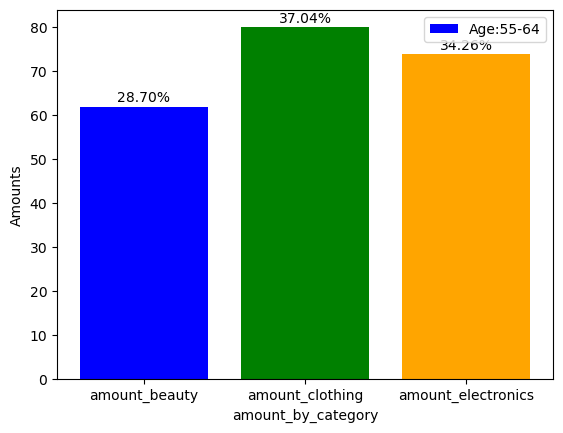

In [69]:
df1 = sum_by_age_category[['Age:18-24', 'Age:25-34', 'Age:35-44', 'Age:45-54', 'Age:55-64']]

for col in df1.columns:
    plt.bar(sum_by_age_category['amount_by_category'], df1[col], color=['blue', 'green', 'orange'], label=col)    
    plt.xlabel('amount_by_category')
    plt.ylabel('Amounts')
    plt.legend()
    for i, value in enumerate(df1[col]):
        percentage = (value / df1[col].sum()) * 100
        plt.text(i, value + 1, f'{percentage:.2f}%', ha='center')
    plt.show()

In [71]:
data4 = retail_sales_df[['product_category', 'gender']]
product_gender = pd.DataFrame(data4)

frequency_table3 = {}
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    for index, row in product_gender.iterrows():
        if row['product_category'] == category:
            gender = row['gender']
            if category in frequency_table3:
                if gender in frequency_table3[category]:
                    frequency_table3[category][gender] += 1
                else:
                    frequency_table3[category][gender] = 1
            else:
                frequency_table3[category] = {gender: 1}

print("Frequency table for each category:")
for category, genders in frequency_table3.items():
    print("Category:", category)
    for gender, count in genders.items():
        print("Gender:", gender, " - Count:", count)

Frequency table for each category:
Category: Beauty
Gender: Male  - Count: 141
Gender: Female  - Count: 166
Category: Clothing
Gender: Female  - Count: 174
Gender: Male  - Count: 177
Category: Electronics
Gender: Male  - Count: 172
Gender: Female  - Count: 170


In [73]:
category_by_gender = pd.DataFrame(frequency_table3)\
.reset_index()\
.rename(columns= {'index':'gender', 'Beauty':'amount_beauty', 'Clothing':'amount_clothing', 'Electronics':'amount_electronics'})
category_by_gender

,gender,amount_beauty,amount_clothing,amount_electronics
0,Male,141,177,172
1,Female,166,174,170


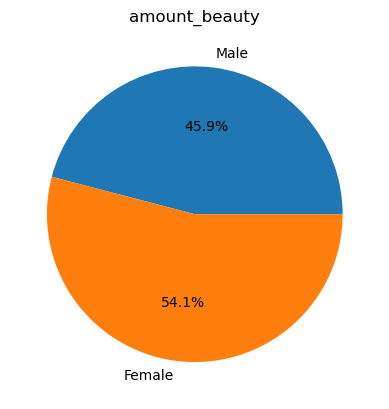

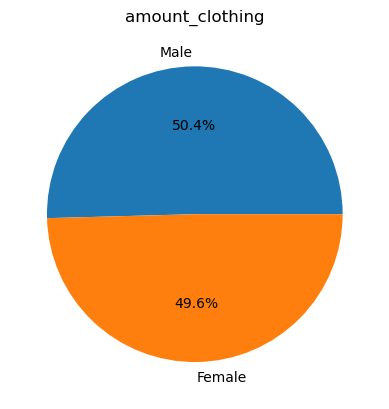

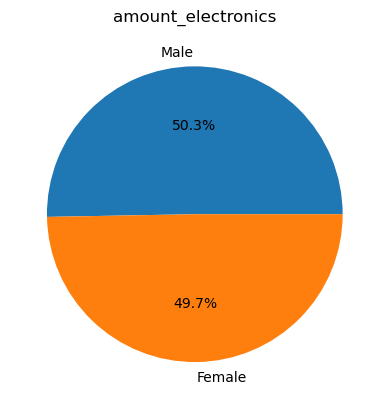

In [75]:
df2= category_by_gender[['amount_beauty','amount_clothing','amount_electronics']]
for col in df2.columns:
    plt.figure()
    plt.pie(df2[col],labels=category_by_gender['gender'],autopct='%1.1f%%')
    plt.title(col)
    plt.show()

#### Analyzing Consumer Behaviour Across Age Groups

This is the market overview delves into how the shopping preferences vary among different age groups:

#### Ages 18-24:
Tend to favor beauty-related items, often exploring products that support personal identity and allow them to try new styles.

#### Ages 25-34, 35–44 and 55–64: 
These consumers are generally drawn to fashion pieces that mirror their lifestyle and individuality, making choices based on their age, social circles, and personal expression.

#### Ages 45–54:
Display a stronger interest in electronic devices, seeking tools and technology that simplify daily routines and enhance productivity.

#### Gender-Based Shopping Behaviour:

Examining consumer choices through the lens of gender highlights notable trends:

Men: Often inclined toward fashion and tech gadgets, showing interest in stylish clothing and the latest electronic innovations that suit their modern lifestyle.

Women: Primarily focus on beauty products, such as skincare and cosmetics, that promote natural appeal and offer creative outlets for self-expression.

#### Conclusion: Insights on Age and Gender Influences in Consumer Preferences

This analysis underscores how both age and gender play pivotal roles in shaping consumer habits. Younger audiences show a marked interest in beauty and self-expression, while older consumers tend to prioritize practical items like apparel and electronics. Gender-wise, men are more focused on clothing and tech, whereas women prefer beauty and personal care items. These insights enable companies to fine-tune their marketing approaches and product offerings, leading to deeper customer engagement and long-term business success.


#### Are there noticable patterns in sales across different time periods?

In [77]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [79]:
sales_pattern=retail_sales_df[['date','product_category','quantity','total_amount']]\
              .sort_values('date')\
              .reset_index()\
              .drop(columns=['index'])
sales_pattern['month']=sales_pattern['date'].dt.strftime('%B')
sales_pattern

,date,product_category,quantity,total_amount,month
0,2023-01-01,Beauty,3,1500,January
1,2023-01-01,Clothing,3,900,January
2,2023-01-01,Clothing,4,1200,January
3,2023-01-02,Electronics,3,90,January
4,2023-01-02,Beauty,1,25,January
...,...,...,...,...,...
995,2023-12-29,Beauty,2,600,December
996,2023-12-29,Beauty,3,1500,December
997,2023-12-31,Electronics,2,50,December
998,2024-01-01,Beauty,3,1500,January


In [81]:
total_sales_daily=pd.DataFrame(sales_pattern[['date','month','total_amount']]\
                  .groupby('date')['total_amount']\
                  .agg('sum'))\
                  .reset_index()
total_sales_daily

,date,total_amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


In [83]:
total_sales_monthly = pd.DataFrame(sales_pattern.groupby('month')['total_amount']
                                   .agg('sum'))\
                                   .reset_index()\
                                   .sort_values('total_amount', ascending=False)
total_sales_monthly

,month,total_amount
8,May,53150
10,October,46580
2,December,44690
3,February,44060
4,January,36980
1,August,36960
6,June,36715
5,July,35465
9,November,34920
0,April,33870


In [85]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
total_amount = [36980, 44060, 28990, 33870, 53150, 36715, 35465, 36960, 23620, 46580, 34920, 44690]

Text(0.5, 1.0, 'Overall sales Monthly')

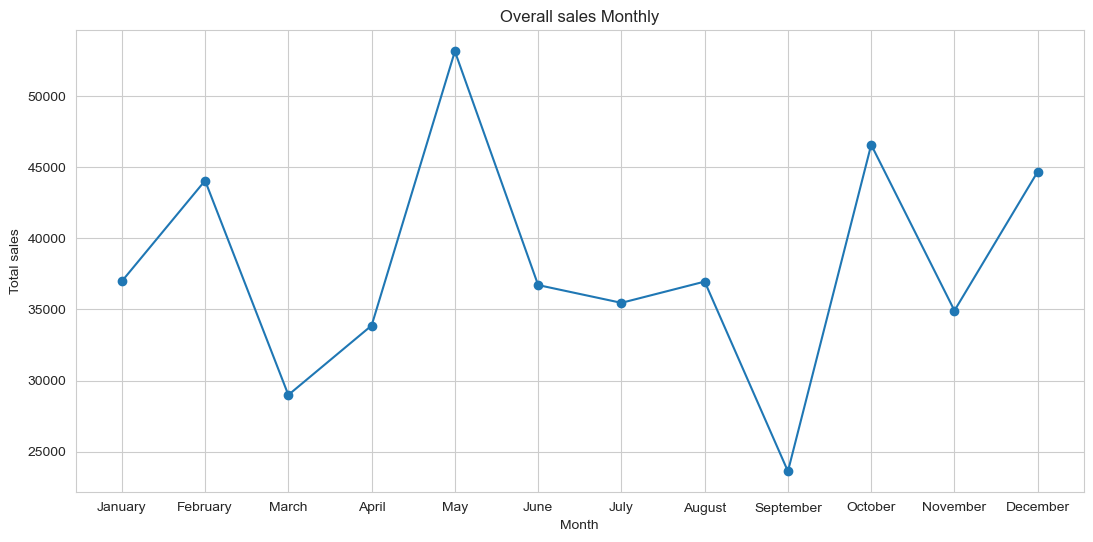

In [87]:
sns.set_style('whitegrid')
plt.figure(figsize=(13,6))
plt.plot(month,total_amount,marker='o')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title("Overall sales Monthly")

In [89]:
def month_to_quarter(month):
    if month in ['January','February','March']:
        return 'Q1'
    elif month in ['April', 'May', 'June']:
        return 'Q2'
    elif month in ['July', 'August', 'September']  :
        return 'Q3'
    elif month in ['October', 'November', 'December']:
        return 'Q4'

In [91]:
total_sales_monthly['quarter'] = total_sales_monthly['month'].apply(month_to_quarter)

total_sales_quarter = total_sales_monthly[['quarter', 'total_amount']]\
                      .groupby('quarter')['total_amount']\
                      .agg('sum')\
                      .reset_index()
total_sales_quarter

,quarter,total_amount
0,Q1,110030
1,Q2,123735
2,Q3,96045
3,Q4,126190


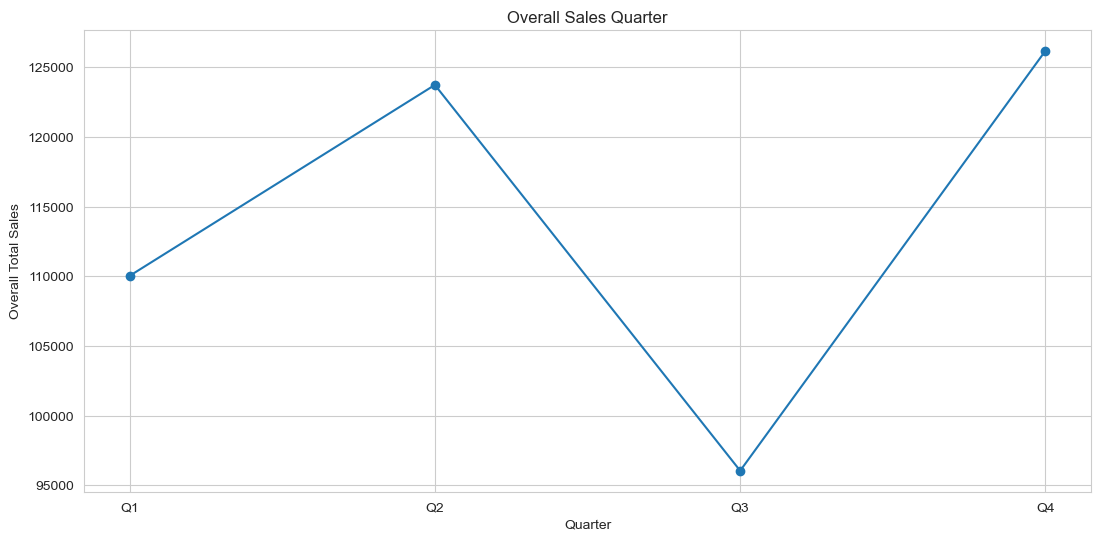

In [93]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(total_sales_quarter['quarter'], total_sales_quarter['total_amount'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Overall Total Sales')
plt.title('Overall Sales Quarter')
plt.show()

In [95]:
# Create a list of product categories
categories = ['Beauty', 'Clothing', 'Electronics']

# Create a list of DataFrames for each product category.
sales_by_category = {}
for category in categories:
    sales_by_category[category] = sales_pattern[sales_pattern['product_category'] == category]

# Display DataFrame for each product category.
for category, df in sales_by_category.items():
    print(f"Sales for {category}:")
    print(df)
    print()

Sales for Beauty:
          date product_category  quantity  total_amount     month
0   2023-01-01           Beauty         3          1500   January
4   2023-01-02           Beauty         1            25   January
7   2023-01-03           Beauty         2           600   January
8   2023-01-04           Beauty         2          1000   January
10  2023-01-04           Beauty         3            90   January
..         ...              ...       ...           ...       ...
988 2023-12-27           Beauty         2           100  December
993 2023-12-29           Beauty         4          1200  December
995 2023-12-29           Beauty         2           600  December
996 2023-12-29           Beauty         3          1500  December
998 2024-01-01           Beauty         3          1500   January

[307 rows x 5 columns]

Sales for Clothing:
          date product_category  quantity  total_amount     month
1   2023-01-01         Clothing         3           900   January
2   2023-01-0

In [97]:
sales_beauty=sales_pattern[sales_pattern['product_category']=='Beauty']
sales_clothing=sales_pattern[sales_pattern['product_category']=='Clothing']
sales_electronics=sales_pattern[sales_pattern['product_category']=='Electronics']

In [99]:
sales_beauty_monthly=pd.DataFrame(sales_beauty.groupby('month')['total_amount']
                      .agg('sum'))\
                      .reset_index()
sale_clothing_monthly = pd.DataFrame(sales_clothing.groupby('month')['total_amount']
                        .agg('sum'))\
                        .reset_index()
sale_electronics_monthly = pd.DataFrame(sales_electronics.groupby('month')['total_amount']
                           .agg('sum'))\
                           .reset_index()
merged_sale_category_monthly = sales_beauty_monthly\
                               .merge(sale_clothing_monthly, on='month')\
                               .merge(sale_electronics_monthly, on='month')\
                               .rename(columns= {'total_amount_x':'sales_beauty', 'total_amount_y':'sale_clothing', 'total_amount':'sale_electronics'})

merged_sale_category_monthly

,month,sales_beauty,sale_clothing,sale_electronics
0,April,11905,13940,8025
1,August,9790,12455,14715
2,December,12400,12070,20220
3,February,14035,14560,15465
4,January,13930,13125,9925
5,July,16090,8250,11125
6,June,10995,10170,15550
7,March,10545,15065,3380
8,May,12450,17455,23245
9,November,9700,15200,10020


In [101]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
total_sale_beauty = [13930, 14035, 10545, 11905, 12450, 10995, 16090, 9790, 6320, 15355, 9700, 12400]
total_sale_clothing = [13125, 14560, 15065, 13940, 17455, 10170, 8250, 12455, 9975, 13315, 15200, 12070]
total_sale_electronics = [9925, 15465, 3380, 8025, 23245, 15550, 11125, 14715, 7325, 17910, 10020, 20220]

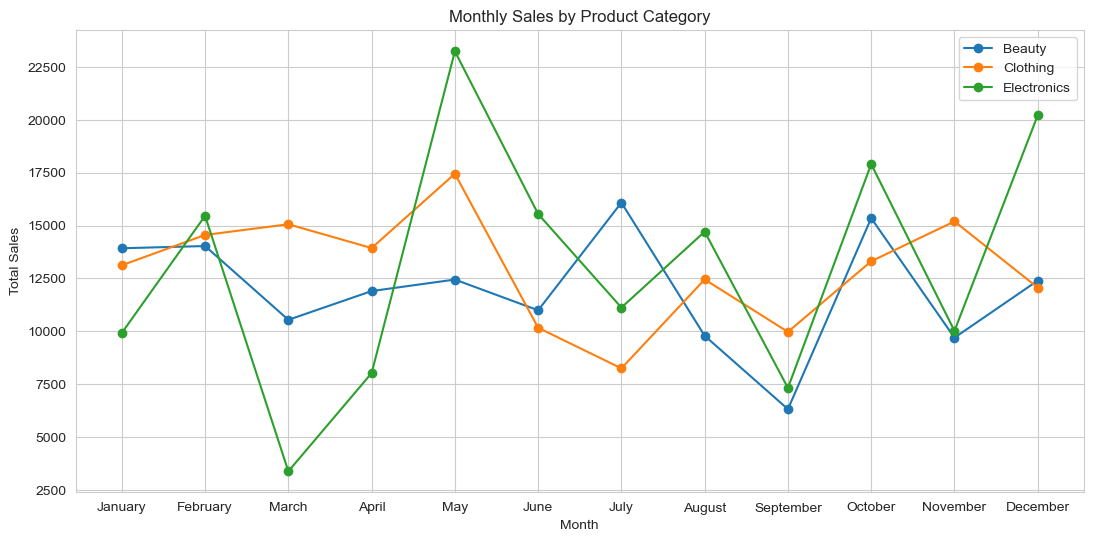

In [103]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(month, total_sale_beauty, marker='o')
plt.plot(month, total_sale_clothing, marker='o')
plt.plot(month, total_sale_electronics, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Monthly Sales by Product Category')
plt.show()

In [105]:
merged_sale_category_monthly['quarter'] = merged_sale_category_monthly['month'].apply(month_to_quarter)
merged_sale_category_monthly.reset_index().drop(columns= ['index']).sort_values('quarter')

,month,sales_beauty,sale_clothing,sale_electronics,quarter
3,February,14035,14560,15465,Q1
4,January,13930,13125,9925,Q1
7,March,10545,15065,3380,Q1
0,April,11905,13940,8025,Q2
6,June,10995,10170,15550,Q2
8,May,12450,17455,23245,Q2
1,August,9790,12455,14715,Q3
5,July,16090,8250,11125,Q3
11,September,6320,9975,7325,Q3
2,December,12400,12070,20220,Q4


In [107]:
merged_sale_category_quarter = merged_sale_category_monthly[['quarter', 'sales_beauty', 'sale_clothing', 'sale_electronics']]\
                               .groupby('quarter')[['sales_beauty', 'sale_clothing', 'sale_electronics']]\
                               .agg('sum')\
                               .reset_index()
merged_sale_category_quarter

,quarter,sales_beauty,sale_clothing,sale_electronics
0,Q1,38510,42750,28770
1,Q2,35350,41565,46820
2,Q3,32200,30680,33165
3,Q4,37455,40585,48150


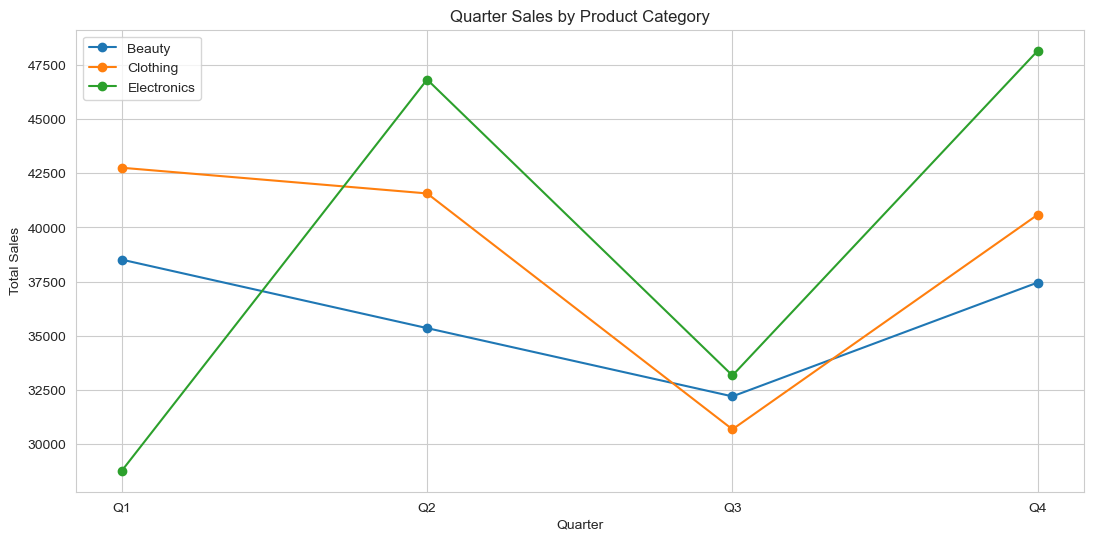

In [109]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sales_beauty'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_clothing'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_electronics'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Quarter Sales by Product Category')
plt.show()

#### Sales Trend Analysis and Reporting Across Multiple Time Frames

Assessing sales performance over distinct time periods is crucial for anticipating future patterns and refining marketing approaches. The following report presents an analysis of sales data for various product categories spanning from January 2023 to January 2024:

#### 1. Monthly Patterns:
Notable peaks in monthly sales were observed in May (Q2), October (Q4), and December (Q4), recording the highest figures at 53,150, 46,580 and 44,690 respectively. In contrast, September reported the lowest monthly sales at just 23,620.

#### 2. Quarterly Insights:
The third quarter experienced a significant dip in overall sales, marking it as the weakest period compared to the other quarters. However, Quarter 4 saw a substantial surge in electronics sales, contributing to a major rise in total sales and surpassing the performance of the earlier quarters.

#### 3. Sales by Product Category:
During the first quarter, clothing products outperformed both beauty and electronics in terms of sales volume. Moving into Quarters 2, 3 and 4, electronics emerged as the dominant category despite an overall slump in product sales during Quarter 3.

#### 4. Top-Selling Months per Product Category in Each Quarter:

#### Beauty Products:

Q1 (February): 14,035

Q2 (May): 12,450

Q3 (July): 16,090

Q4 (October): 15,355

#### Clothing:

Q1 (March): 15,065

Q2 (May): 17,455

Q3 (August): 12,455

Q4 (November): 15,420

#### Electronics:

Q1 (February): 15,465

Q2 (May): 23,245

Q3 (August): 14,715

Q4 (December): 20,220

By evaluating trends across months, quarters, and product categories, businesses can better understand consumer behavior, enabling smarter inventory planning and marketing execution. Adjusting strategies in response to these trends can significantly improve profitability and operational efficiency over time.



### Which product categories hold the highest appeal among the customers?

In [111]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [113]:
quantity_by_category=retail_sales_df[['product_category','quantity','price_per_unit']]
quantity_by_category

,product_category,quantity,price_per_unit
0,Beauty,3,50
1,Clothing,2,500
2,Electronics,1,30
3,Clothing,1,500
4,Beauty,2,50
...,...,...,...
995,Clothing,1,50
996,Beauty,3,30
997,Beauty,4,25
998,Electronics,3,50


In [115]:
sum_quantity_by_category = pd.DataFrame(quantity_by_category.groupby('product_category')['quantity']
                                        .agg('sum'))\
                                        .reset_index()\
                                        .sort_values('quantity')
sum_quantity_by_category

,product_category,quantity
0,Beauty,771
2,Electronics,849
1,Clothing,894


Text(0.5, 1.0, 'Quantity by Product Category')

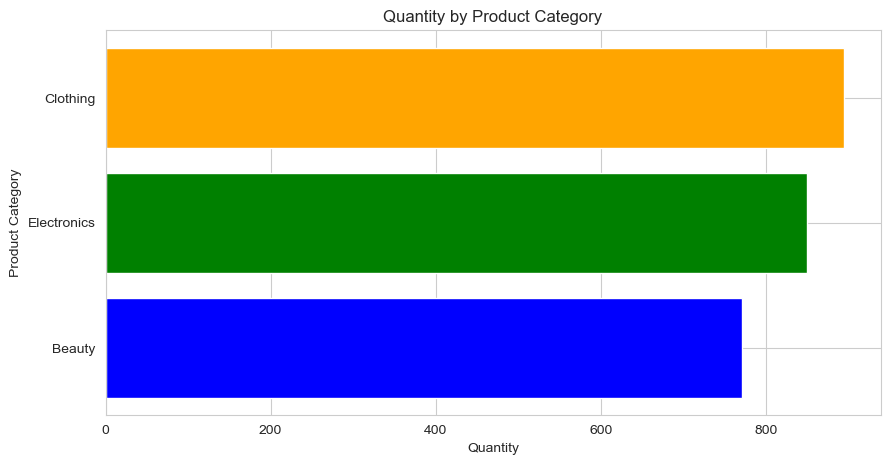

In [117]:
plt.figure(figsize=(10, 5))
plt.barh(sum_quantity_by_category['product_category'],  sum_quantity_by_category['quantity'], color=['blue', 'green', 'orange'])
plt.ylabel('Product Category')
plt.xlabel('Quantity')
plt.title('Quantity by Product Category')

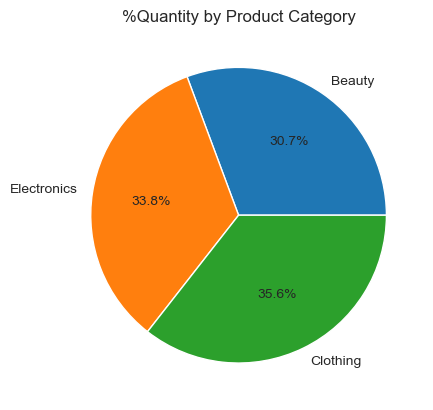

In [119]:
plt.figure()  
plt.pie(sum_quantity_by_category['quantity'], labels=sum_quantity_by_category['product_category'], autopct='%1.1f%%')  
plt.title('%Quantity by Product Category')  
plt.show()

In [121]:
quantity_by_category.head()

,product_category,quantity,price_per_unit
0,Beauty,3,50
1,Clothing,2,500
2,Electronics,1,30
3,Clothing,1,500
4,Beauty,2,50


In [123]:
quantity_product_by_category_and_price_per_unit = pd.DataFrame(frequency_table1)\
                                                    .reset_index()\
                                                    .rename(columns= {'index':'price_per_unit',
                                                                      'Beauty':'amount_beauty',
                                                                      'Clothing':'amount_clothing',
                                                                      'Electronics':'amount_electronics'})
quantity_product_by_category_and_price_per_unit


,price_per_unit,amount_beauty,amount_clothing,amount_electronics
0,50,67,75,69
1,30,56,65,62
2,25,63,75,72
3,500,68,64,67
4,300,53,72,72


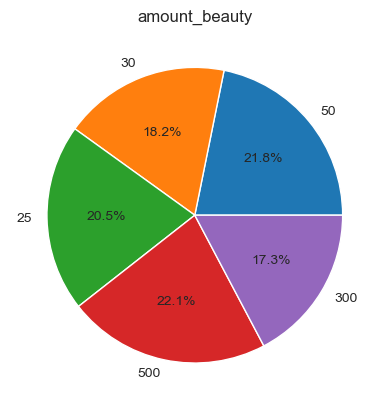

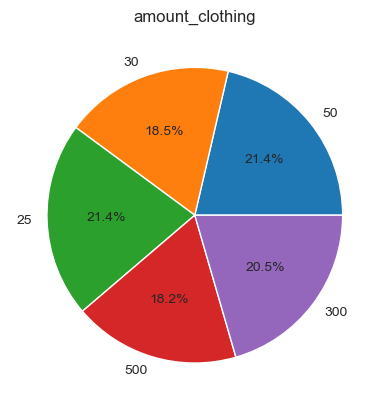

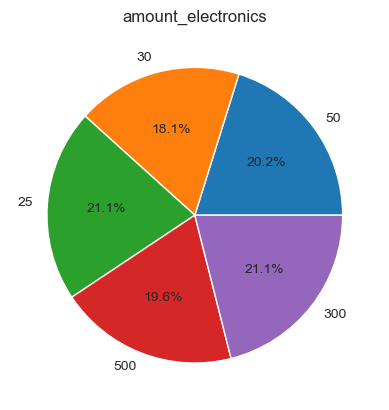

In [125]:
df9 = quantity_product_by_category_and_price_per_unit[['amount_beauty', 'amount_clothing', 'amount_electronics']]

for col in df9.columns:
    plt.figure()  
    plt.pie(df9[col], labels=quantity_product_by_category_and_price_per_unit['price_per_unit'], autopct='%1.1f%%')  
    plt.title(col)  
    plt.show()

#### Understanding Product Category Popularity

Gaining insights into product popularity is vital for companies aiming to stay aligned with consumer preferences. Such analysis plays a key role in shaping effective marketing tactics and guiding future product innovations.

#### According to the survey, the top three product categories among consumers are:

Clothing with 35.6%

Electronics at 33.8%, and

Beauty products with 30.7%.

When analyzing buying behavior based on item pricing, noteworthy patterns become apparent:

In the Clothing category, products priced at 25 and 50 are most favored, both at 21.4%, whereas those priced at 500 show the lowest interest, with only 18.2% popularity.

For Electronics, items marked at 25 and 300 stand out as the most purchased, each gaining 21.1%, while the least purchased are those priced at 30, drawing only 18.1%.

In the Beauty category, high-end products priced at 500 see the highest preference at 22.1%, whereas those at 300 receive the lowest attention at 17.3%.

This study highlights how crucial it is for businesses to monitor both category-specific preferences and price sensitivity. Leveraging this information can lead to more targeted marketing efforts and smarter product development tailored to consumer needs.

### What are the relationships between age,spending and the product preferences?

In [130]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [132]:
relation=retail_sales_df[['gender','age','product_category','quantity','total_amount','age_group']]
relation

,gender,age,product_category,quantity,total_amount,age_group
0,Male,34,Beauty,3,150,Age:25-34
1,Female,26,Clothing,2,1000,Age:25-34
2,Male,50,Electronics,1,30,Age:45-54
3,Male,37,Clothing,1,500,Age:35-44
4,Male,30,Beauty,2,100,Age:25-34
...,...,...,...,...,...,...
995,Male,62,Clothing,1,50,Age:55-64
996,Male,52,Beauty,3,90,Age:45-54
997,Female,23,Beauty,4,100,Age:18-24
998,Female,36,Electronics,3,150,Age:35-44


In [134]:
overall_spending_agegroup=pd.DataFrame(relation.groupby('age_group')['total_amount'].agg('sum')).reset_index()
overall_spending_agegroup

,age_group,total_amount
0,Age:18-24,74650
1,Age:25-34,97090
2,Age:35-44,96835
3,Age:45-54,97235
4,Age:55-64,90190


In [136]:
customer_18_24 = relation[ relation['age_group'] == 'Age:18-24' ].sort_values('product_category')
customer_25_34 = relation[ relation['age_group'] == 'Age:25-34' ].sort_values('product_category')
customer_35_44 = relation[ relation['age_group'] == 'Age:35-44' ].sort_values('product_category')
customer_45_54 = relation[ relation['age_group'] == 'Age:45-54' ].sort_values('product_category')
customer_55_64 = relation[ relation['age_group'] == 'Age:55-64' ].sort_values('product_category')

In [138]:
customer_18_24.head()

,gender,age,product_category,quantity,total_amount,age_group
997,Female,23,Beauty,4,100,Age:18-24
668,Male,24,Beauty,4,1200,Age:18-24
446,Male,22,Beauty,4,2000,Age:18-24
643,Male,23,Beauty,3,75,Age:18-24
239,Female,23,Beauty,1,300,Age:18-24


In [144]:
customer_18_24_category = pd.DataFrame(customer_18_24.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_25_34_category = pd.DataFrame(customer_25_34.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_35_44_category = pd.DataFrame(customer_35_44.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_45_54_category = pd.DataFrame(customer_45_54.groupby('product_category')['total_amount'].agg('sum').reset_index())
customer_55_64_category = pd.DataFrame(customer_55_64.groupby('product_category')['total_amount'].agg('sum').reset_index())

In [148]:
customer_55_64_category

,product_category,total_amount
0,Beauty,20670
1,Clothing,31310
2,Electronics,38210


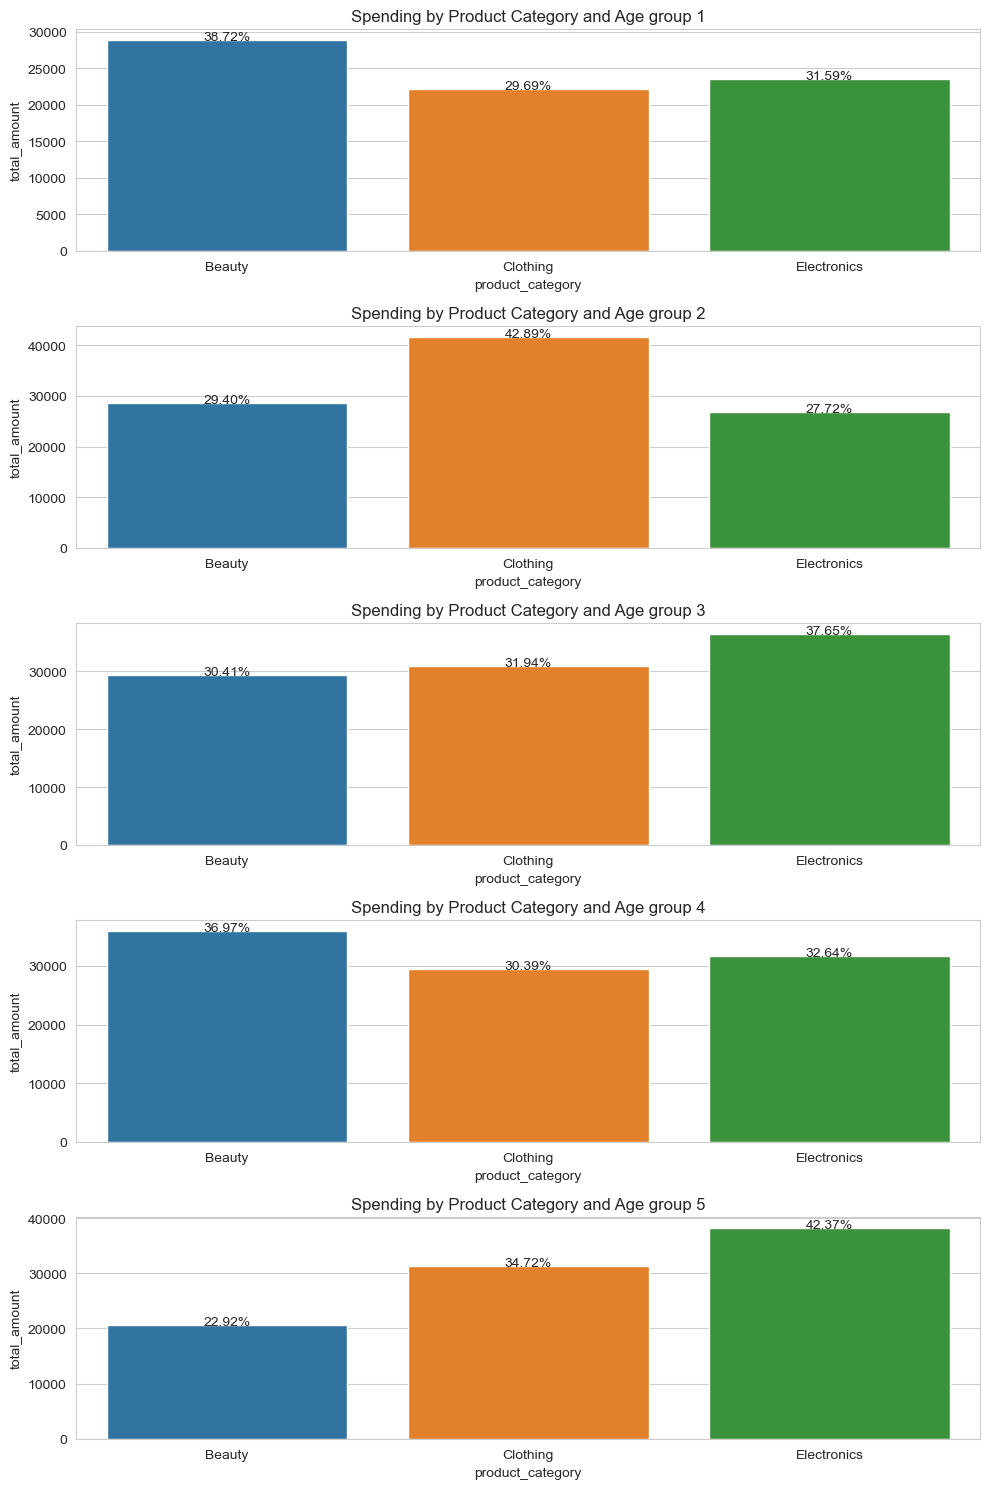

In [150]:
customer_age_category_df = [customer_18_24_category, customer_25_34_category, customer_35_44_category, customer_45_54_category, customer_55_64_category]

# Create a subplot with multiple rows.
fig, axes = plt.subplots(nrows=len(customer_age_category_df), figsize=(10, 15))

# Loop to create bar graphs for each age group.
for i, df in enumerate(customer_age_category_df):
    sns.barplot(x='product_category', y='total_amount', hue='product_category', data=df, ax=axes[i])
    axes[i].set_title(f'Spending by Product Category and Age group {i+1}')
    for j, value in enumerate(df['total_amount']):
        percentage = (value / df['total_amount'].sum()) * 100
        axes[i].text(j, value + 1, f'{percentage:.2f}%', ha='center')
    
    
plt.tight_layout()
plt.show()

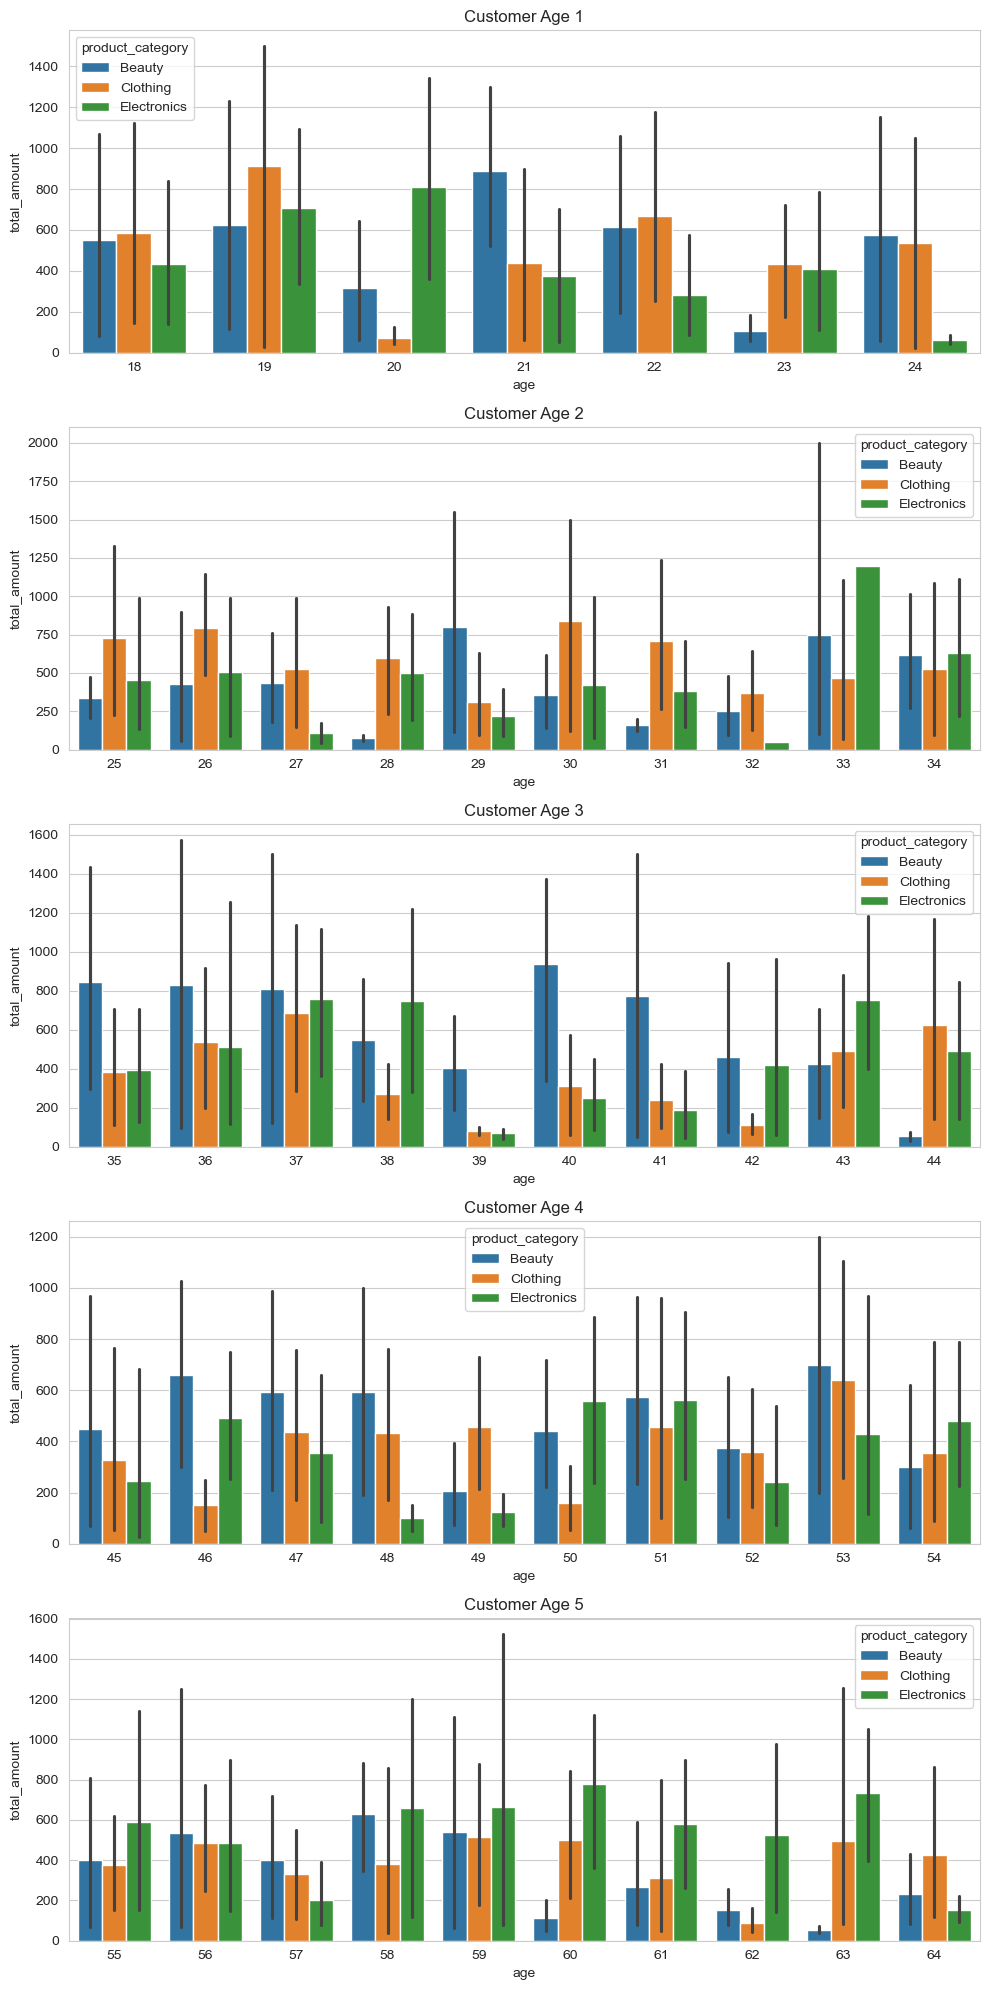

In [152]:
customer_age_df = [customer_18_24, customer_25_34, customer_35_44, customer_45_54, customer_55_64]

# Create a subplot with multiple rows. 
fig, axes = plt.subplots(nrows=len(customer_age_df), figsize=(10, 20))

# Loop to create bar graphs for each age group.
for i, df in enumerate(customer_age_df):
    sns.barplot(x='age', y='total_amount', hue='product_category', data=df, ax=axes[i])
    axes[i].set_title(f'Customer Age {i+1}')

plt.tight_layout()
plt.show()

#### Exploring the Link Between Age, Spending Habits, and Product Choices

Recognizing how age impacts consumer spending and product interests is key for businesses aiming to craft targeted marketing strategies. By dividing consumers into five age brackets—18–24, 25–34, 35–44, 45–54, and 55–64—valuable trends can be identified.

Survey data shows the distribution of spending across age groups in terms of percentage and total value:

Age 45–54:21.32% (₹97,235)

Age 25–34: 21.29% (₹97,090)

Age 35–44: 21.24% (₹96,835)

Age 55–64: 19.78% (₹90,190)

Age 18–24: 16.37% (₹74,650)

#### When examining which products each group prefers, clear trends emerge:

Individuals aged 18–24 (38.72%, 28,905) and 45–54 (36.97%, 35,950) show a strong inclination toward beauty items.

Consumers in the 25–34 range (42.89%, 41,640) exhibit a preference for clothing.

Age groups 35–44 (37.65%, 36,460) and 55–64 (42.37%, 38,210) predominantly favor electronics.

These insights reflect varying consumer interests across age demographics. By aligning product offerings and promotional strategies with these age-specific trends, businesses can increase both engagement and satisfaction levels. Ultimately, understanding how age affects spending and preferences helps companies stay relevant and competitive in a dynamic market environment.

#### How do customers adapt their shopping habits during seasonal trends?

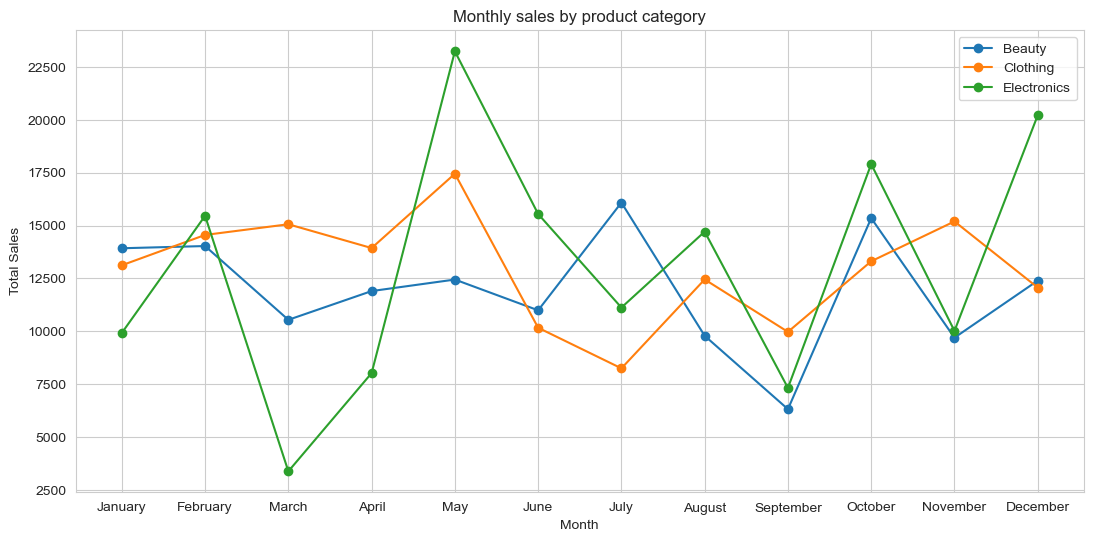

In [156]:
sns.set_style('whitegrid')
plt.figure(figsize=(13,6))
plt.plot(month,total_sale_beauty,marker='o')
plt.plot(month,total_sale_clothing,marker='o')
plt.plot(month,total_sale_electronics,marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(['Beauty','Clothing','Electronics'])
plt.title('Monthly sales by product category')
plt.show()

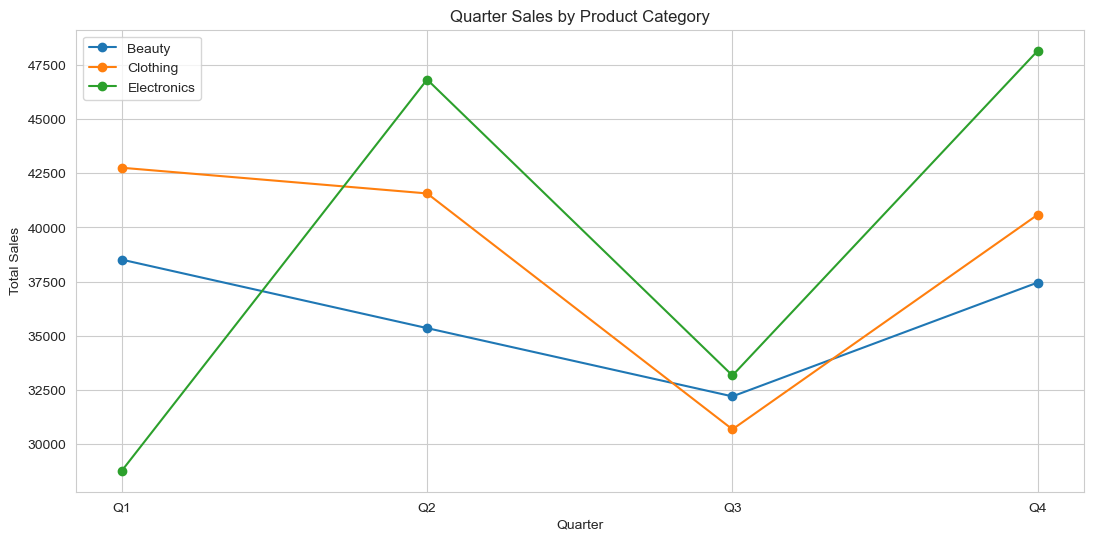

In [158]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sales_beauty'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_clothing'], marker='o')
plt.plot(merged_sale_category_quarter['quarter'], merged_sale_category_quarter['sale_electronics'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(['Beauty', 'Clothing', 'Electronics'])
plt.title('Quarter Sales by Product Category')
plt.show()

#### Seasonal Shifts in Customer Purchasing Behavior:

Examining how customer buying habits evolve across different seasons helps uncover notable shopping trends. By closely studying this data, businesses can refine both their marketing strategies and product selections to better align with consumer needs.

#### Shifting Purchase Patterns by Quarter:

##### Q1–Q2:
During this period, there's a noticeable increase in electronics sales, while purchases in other categories decline. This change can be attributed to various social and market dynamics, such as new product releases, seasonal discounts, or lifestyle shifts influencing buying decisions.

##### Q2–Q3:
This phase witnesses an overall drop in consumer spending, especially in clothing and electronics. Contributing factors may include changing economic situations, consumer spending hesitations, or evolving fashion trends impacting shopping preferences.

##### Q3–Q4:
As the year approaches its end, there’s a resurgence in purchasing activity, marked by a rise in overall sales. This rebound may result from festive seasons, year-end promotions, or a renewed interest in consumer goods, leading to a return to earlier buying patterns.

##### Conclusion:
Analyzing seasonal consumer behavior clearly demonstrates how it influences market trends and sales performance. To keep up with these shifts, businesses must continuously evolve their marketing approaches and update product lines. Aligning with changing customer behaviors will be essential for boosting future sales and maintaining a competitive edge.

#### Are there distinct purchasing behaviours based on the number of items bought per transaction?

In [162]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [168]:
quantity_per_transaction = retail_sales_df[['transaction_id', 'product_category', 'quantity', 'price_per_unit']]
quantity_per_transaction.head()

,transaction_id,product_category,quantity,price_per_unit
0,1,Beauty,3,50
1,2,Clothing,2,500
2,3,Electronics,1,30
3,4,Clothing,1,500
4,5,Beauty,2,50


In [170]:
beauty_quantity_per_transaction = pd.DataFrame(quantity_per_transaction[quantity_per_transaction['product_category'] == 'Beauty' ]\
                                               .groupby('quantity')['quantity']\
                                               .agg('count'))\
                                               .rename(columns= {'quantity':'beauty_amount_quantity'})\
                                               .reset_index()
clothing_quantity_per_transaction = pd.DataFrame(quantity_per_transaction[quantity_per_transaction['product_category'] == 'Clothing' ]\
                                                 .groupby('quantity')['quantity']\
                                                 .agg('count'))\
                                                 .rename(columns= {'quantity':'clothing_amount_quantity'})\
                                                 .reset_index()
electronics_quantity_per_transaction = pd.DataFrame(quantity_per_transaction[quantity_per_transaction['product_category'] == 'Electronics' ]\
                                                    .groupby('quantity')['quantity']\
                                                    .agg('count'))\
                                                    .rename(columns= {'quantity':'electronics_amount_quantity'})\
                                                    .reset_index()

In [172]:
beauty_quantity_per_transaction

,quantity,beauty_amount_quantity
0,1,74
1,2,75
2,3,85
3,4,73


In [174]:
count_quantity_per_transaction = beauty_quantity_per_transaction.merge(clothing_quantity_per_transaction, on='quantity').merge(electronics_quantity_per_transaction, on='quantity')
count_quantity_per_transaction

,quantity,beauty_amount_quantity,clothing_amount_quantity,electronics_amount_quantity
0,1,74,88,91
1,2,75,80,88
2,3,85,86,70
3,4,73,97,93


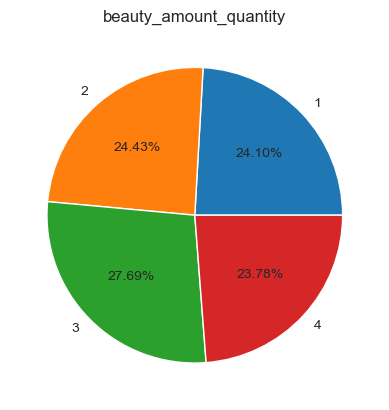

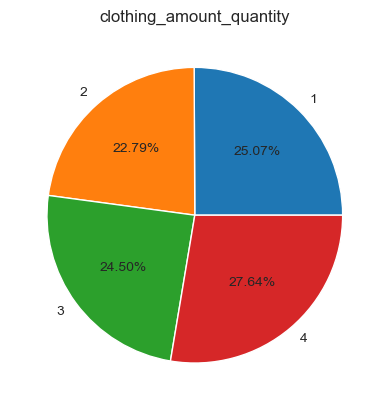

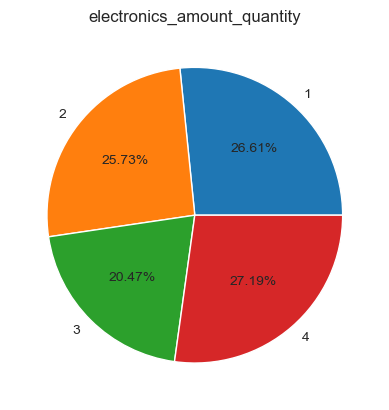

In [178]:
df10 = count_quantity_per_transaction[['beauty_amount_quantity', 'clothing_amount_quantity', 'electronics_amount_quantity']]

for col in df10.columns:
    plt.figure()  
    plt.pie(df10[col], labels=count_quantity_per_transaction['quantity'], autopct='%1.2f%%')  
    plt.title(col)  
    plt.show()

#### What insights can be drawn form the distribution of product prices within each category?

In [181]:
retail_sales_df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Age:25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Age:25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Age:45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Age:35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Age:25-34


In [183]:
product_prices_by_category=retail_sales_df[['date','gender','age','product_category', 'quantity', 'price_per_unit', 'total_amount', 'age_group']]
product_prices_by_category.head()

,date,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,2023-11-24,Male,34,Beauty,3,50,150,Age:25-34
1,2023-02-27,Female,26,Clothing,2,500,1000,Age:25-34
2,2023-01-13,Male,50,Electronics,1,30,30,Age:45-54
3,2023-05-21,Male,37,Clothing,1,500,500,Age:35-44
4,2023-05-06,Male,30,Beauty,2,50,100,Age:25-34


In [185]:
product_prices_by_category[ product_prices_by_category['product_category'] == 'Beauty'].head()

,date,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
0,2023-11-24,Male,34,Beauty,3,50,150,Age:25-34
4,2023-05-06,Male,30,Beauty,2,50,100,Age:25-34
5,2023-04-25,Female,45,Beauty,1,30,30,Age:45-54
11,2023-10-30,Male,35,Beauty,3,25,75,Age:35-44
20,2023-01-14,Female,50,Beauty,1,500,500,Age:45-54


In [187]:
df99 = pd.DataFrame(product_prices_by_category.groupby(['product_category', 'price_per_unit'])['quantity']\
                    .sum())\
                    .reset_index()\
                    .sort_values('price_per_unit')
df99['total_sales'] = df99['price_per_unit'] * df99['quantity']
df99


,product_category,price_per_unit,quantity,total_sales
0,Beauty,25,157,3925
5,Clothing,25,184,4600
10,Electronics,25,181,4525
1,Beauty,30,133,3990
6,Clothing,30,171,5130
11,Electronics,30,141,4230
2,Beauty,50,170,8500
7,Clothing,50,189,9450
12,Electronics,50,175,8750
3,Beauty,300,142,42600


#### 1.Top selling items at same price levels

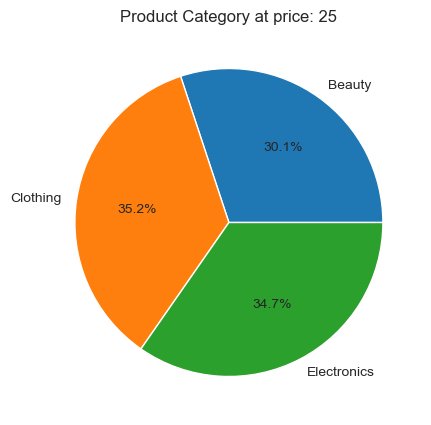

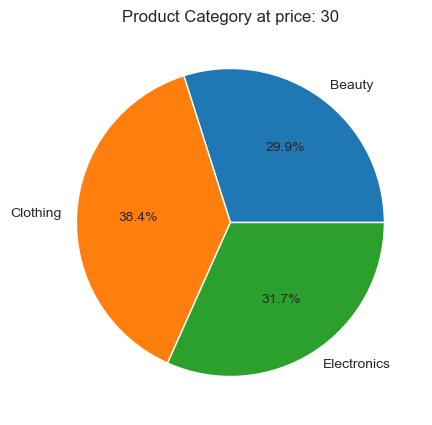

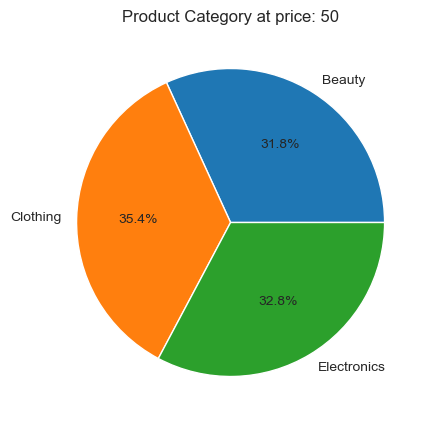

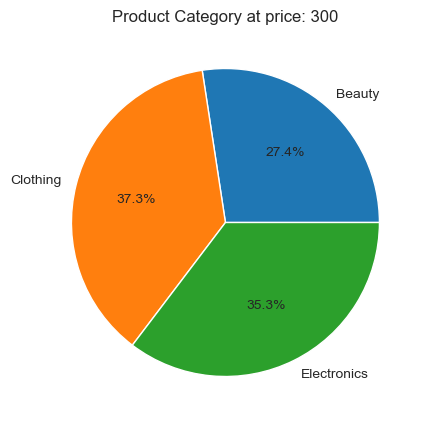

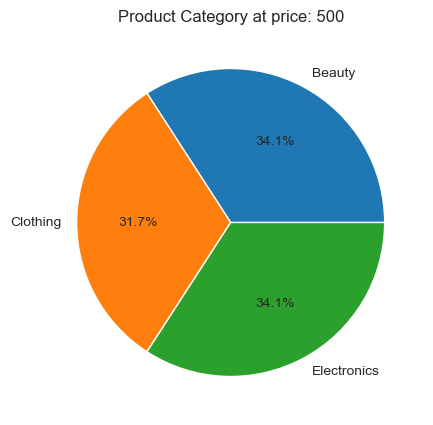

In [191]:
for price in prices:
    subset_data = df99[df99['price_per_unit'] == price]
    quantity_by_category = subset_data.groupby('product_category')['quantity'].sum()
    plt.figure(figsize=(5, 5))
    plt.pie(quantity_by_category, labels=quantity_by_category.index, autopct='%1.1f%%')
    plt.title(f"Product Category at price: {price}")
    plt.show()

#### 2. Sales volume across price levels,compared within each category

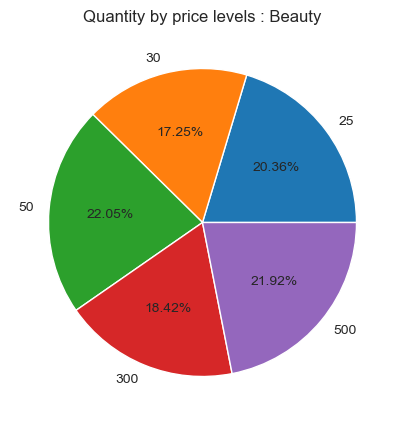

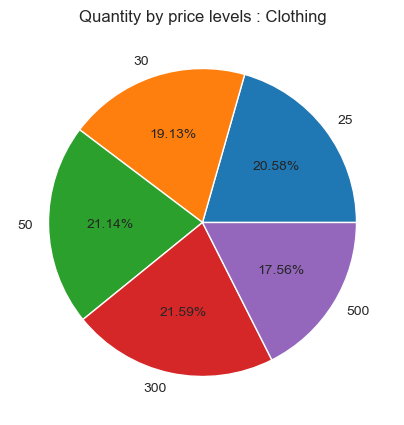

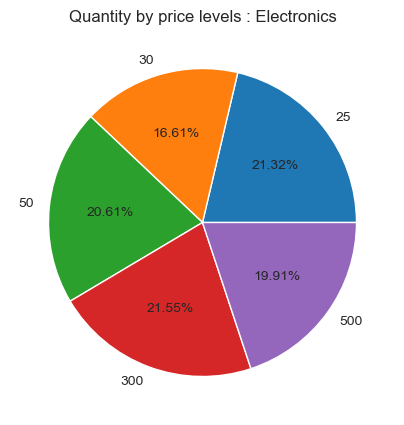

In [199]:
categories = ['Beauty', 'Clothing', 'Electronics']

for category in categories:
    subset_data = df99[df99['product_category'] == category]
    quantity_by_category = subset_data.groupby('price_per_unit')['quantity'].sum()
    plt.figure(figsize=(5, 5))
    plt.pie(quantity_by_category, labels=quantity_by_category.index, autopct='%1.2f%%')
    plt.title(f"Quantity by price levels : {category}")
    plt.show()

#### Gaining Insights from Price Distribution Across Product Categories

Investigating the distribution of product prices within each category offers meaningful perspectives on consumer preferences and purchasing patterns. Let’s take a closer look at the patterns that emerge from the data:

#### Top-Selling Items at Identical Price Points:

In the Clothing segment, top-selling products are concentrated around the price points of 25, 30, 50, and 300, with respective sales volumes of 184 (35.2%), 171 (38.4%), 189 (35.4%), and 193 (37.3%) units.

Notably, in both the Beauty and Electronics categories, the ₹500 price point proves to be highly successful, with 169 units sold in each and a consistent market share of 34.1% per category.

#### Comparative Sales Across Price Ranges Within Each Category:

In the Beauty category, the most to least preferred pricing follows the pattern: 50 → 500 → 25 → 300 → 30.

For Clothing, the sequence is: 300 → 50 → 25 → 30 → 500, highlighting a strong preference for mid-to-high-range pricing.

In the case of Electronics, the pricing hierarchy is: 300 → 25 → 50 → 500 → 30, reflecting balanced demand across several tiers.

These patterns provide actionable insights for businesses aiming to align their pricing models with consumer expectations. Understanding how customers respond to different price levels within each category can help refine both marketing strategies and product assortments. Strategically pricing products based on customer behavior not only enhances satisfaction but also drives greater sales performance and market growth.

